# Analysis of PIV pressor use and possible extravasation
- Ruoyi Jiang
- October 9, 2019
- Pre-liminary

In [34]:
library(tidyverse)
library(fasttime)
library(ggplot2)

### Check terbutaline, phentolamine usage by pharmacy

In [2]:
prescriptions <- read_csv("/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/mimic/PRESCRIPTIONS.csv.gz")

Parsed with column specification:
cols(
  ROW_ID = col_double(),
  SUBJECT_ID = col_double(),
  HADM_ID = col_double(),
  ICUSTAY_ID = col_double(),
  STARTDATE = col_datetime(format = ""),
  ENDDATE = col_datetime(format = ""),
  DRUG_TYPE = col_character(),
  DRUG = col_character(),
  DRUG_NAME_POE = col_character(),
  DRUG_NAME_GENERIC = col_character(),
  FORMULARY_DRUG_CD = col_character(),
  GSN = col_character(),
  NDC = col_character(),
  PROD_STRENGTH = col_character(),
  DOSE_VAL_RX = col_character(),
  DOSE_UNIT_RX = col_character(),
  FORM_VAL_DISP = col_character(),
  FORM_UNIT_DISP = col_character(),
  ROUTE = col_character()
)


In [6]:
prescriptions %>% filter(DRUG_NAME_GENERIC == "Phentolamine Mesylate") %>% head()

ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2193190,608,171266,NA,2167-03-09,2167-03-10,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,54569470200,5MG VIAL,5,mg,1,VIAL,IV
2193189,608,171266,NA,2167-03-09,2167-03-10,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,54569470200,5MG VIAL,5,mg,1,VIAL,ID
2666873,1849,114623,274141,2171-06-04,2171-06-04,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5 mg Vial,5,mg,1,VIAL,SC
2666874,1849,114623,274141,2171-06-04,2171-06-05,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5 mg Vial,5,mg,1,VIAL,SC
1446361,1931,109646,NA,2179-08-07,2179-08-08,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5MG VIAL,5,mg,1,VIAL,IV
2848413,4331,120294,265287,2142-11-02,2142-11-03,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5 mg Vial,10,mg,2,VIAL,SC


In [30]:
prescriptions %>% filter(DRUG_NAME_GENERIC == "Phentolamine Mesylate") %>% dim()

[1] 49 19

In [4]:
prescriptions %>% filter(DRUG_NAME_GENERIC == "Terbutaline Sulfate") %>% dim()

[1]  6 19

In [5]:
prescriptions %>% filter(grepl("Nitroglycerin", DRUG_NAME_GENERIC)) %>% dim()

[1] 5253   19

### Extract nitroglycerin events from CHARTEVENTS

In [ ]:
# find extract nitro events in CHARTEVENTS (need to use pressors sql script)
#https://physionet.org/files/mimiciii-demo/1.4/d_items.csv

In [7]:
nitroglycerin_df = read.csv('/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/out/nitroglycerin.csv')

In [8]:
nitroglycerin_df %>% head()

X,index,icustay_id,vasonum,starttime,endtime,duration_hours
<int>,<int>,<dbl>,<int>,<fct>,<fct>,<dbl>
0,0,200007,1,2109-02-17 11:00:00,2109-02-18 09:15:00,22.250000
1,1,200063,1,2141-03-10 07:10:00,2141-03-10 13:06:00,5.933333
2,2,200063,2,2141-03-10 13:06:00,2141-03-10 14:34:00,1.466667
3,3,200063,3,2141-03-10 14:34:00,2141-03-10 21:36:00,7.033333
4,4,200063,4,2141-03-10 21:36:00,2141-03-11 02:04:00,4.466667
5,5,200063,5,2141-03-11 02:04:00,2141-03-11 06:23:00,4.316667


### Look for number of pressor courses prior to CVC introduction

If you want to get a 30-minute survey of the extravasation question, you can create a filter of vasopressors without a central line at the same time. This can give us our n for how many times vasopressors were used without a CVC and some summary statistics about how long it took until a CVC was placed. Then we can look for med administrations of terbutaline/phentolamine/nitro ointments also in those time windows. No rush whatsoever. No one else will think of this question. It could provide the inspiration to do a similar retrospective study at Yale, which will have integrated ED, ICU, and floor data.

In [10]:
pressors_df <- read.csv('~/Projects/Haimovich_Pressors/collection/out/pressors.csv')

In [13]:
pressors_df %>%
    group_by(pressor) %>%
    summarize(COUNT = n())

pressor,COUNT
<fct>,<int>
adenosinedurations,160
arterial_line_durations,30424
central_line_durations,38211
crrtdurations,5918
dobutaminedurations,1792
dopaminedurations,6524
epinephrinedurations,3126
isupreldurations,24
milrinonedurations,3600


In [17]:
# extract out earliest cvc starttimes per ICU visit
cvc_df <- pressors_df %>%
    filter(pressor == "central_line_durations") %>% 
    select(starttime, icustay_id) %>% 
    group_by(icustay_id) %>% filter(min(fastPOSIXct(starttime))==fastPOSIXct(starttime))

In [19]:
# extract out vasopressor duration endtimes
pressorend_df <- pressors_df %>%
    filter(pressor == "vasopressordurations") %>% 
    select(endtime, icustay_id)

In [21]:
# how many vasopressor courses were there?
pressorend_df %>%
    left_join(cvc_df, by='icustay_id') %>% 
    dim()

[1] 39391     3

In [31]:
# find vasopressor courses where the cvc starttime came after the pressor endtime
pressorend_df %>%
    left_join(cvc_df, by='icustay_id') %>% 
    filter(fastPOSIXct(starttime) > fastPOSIXct(endtime)) %>%
    dim()

[1] 4235    3

Warning message:
“Grouping rowwise data frame strips rowwise nature”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 144 rows containing non-finite values (stat_bin).”Warning message:
“Removed 144 rows containing non-finite values (stat_density).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

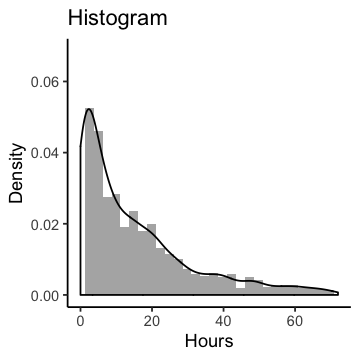

In [36]:
options(repr.plot.width=3, repr.plot.height=3)

# plot duration between last pressor course ended and CVC was started
pressorend_df %>%
    left_join(cvc_df, by='icustay_id') %>% 
    filter(fastPOSIXct(starttime) > fastPOSIXct(endtime)) %>%
    rowwise() %>% 
    mutate(DIFF = difftime(fastPOSIXct(starttime), fastPOSIXct(endtime), units="hours")) %>%
    group_by(icustay_id) %>%
    filter(DIFF == min(DIFF)) %>%
    ggplot(aes(x=DIFF)) +
        geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
        geom_density(alpha=0.6)+
        xlim(0, 72) +
        scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        labs(title="Histogram",x="Hours", y = "Density")+
        theme_classic()